# <center>S&P 500 ANALYSIS</center>

# PREPARATION

In [1]:
# IMPORT MODULES
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import sys
import string

In [2]:
# IMPORT DATA
filename = 'SP.csv'
# https://www.kaggle.com/finnhub/sp-500-futures-tick-data-sp
df_original = pd.read_csv(filename)

In [3]:
# PREVIEW DATA
n = df_original.shape[0]
num_cols = df_original.shape[1]
print(f'Number of rows: {n}')
print(f'Number of columns: {num_cols}')
df_original

Number of rows: 13802502
Number of columns: 4


,date,time,price,volume
0,01/03/2000,08:30:34.000,1496.4,0
1,01/03/2000,08:30:36.000,1496.0,0
2,01/03/2000,08:30:37.000,1495.5,0
3,01/03/2000,08:30:46.000,1495.0,0
4,01/03/2000,08:30:53.000,1495.5,0
...,...,...,...,...
13802497,12/31/2019,15:00:02.086,3232.0,0
13802498,12/31/2019,15:00:09.277,3231.5,0
13802499,12/31/2019,15:00:14.203,3230.5,0
13802500,12/31/2019,15:01:09.088,3233.0,0


In [4]:
# PARAMETERS
np.set_printoptions(threshold=sys.maxsize)
alphabet = string.ascii_uppercase
analysisHeadings = ['Entries', 'Trades', 'Total volume', 'Mean volume', 'Std volume', 'Mean volume positive', 'Std volume pos', 'Max volume', \
                    'Min price', 'Max_price', 'Mean price', 'Median price', 'Std price', \
                    'Min time', 'Max time']

In [5]:
# CONVERT TIME TO DATETIME FORMAT
df = df_original.copy()
df['date'] = pd.to_datetime(df['date'])
df['date']

0          2000-01-03
1          2000-01-03
2          2000-01-03
3          2000-01-03
4          2000-01-03
              ...    
13802497   2019-12-31
13802498   2019-12-31
13802499   2019-12-31
13802500   2019-12-31
13802501   2019-12-31
Name: date, Length: 13802502, dtype: datetime64[ns]

In [6]:
# SERIES
series_dates = df['date']
# series_dates_dt = series_dates.astype("datetime64")
series_times = df['time']
series_prices = df['price']
series_volumes = df['volume']

In [7]:
# FUNCTIONS
# Return DF for a particular date
def DFDate(df, date):
    df_date = df[ df['date'] == date]
    return df_date

# Return DF for a particular day of week
def DFDay(df, day):
    df_day = df[df['date'].dt.dayofweek.eq(day)]
    return df_day

# Return DF for a particular month
def DFMonth(df, month):
    df_month = df[df['date'].dt.month.eq(month)]
    return df_month

# Return DF for a particular year
def DFYear(df, year):
    df_year = df[df['date'].dt.year.eq(year)]
    return df_year

# Return DF of trades
def DFTrades(df):
    logical_trades = (df['volume'] != 0)
    df_trades = df[logical_trades]
    return df_trades

# Analyse trade, price, volume data
def Analysis(df):
    '''Related: analysisHeadings, column_widths, total_formulas'''
    df_trades = DFTrades(df)
    series_volume = df['volume']
    num_entries = df.shape[0]
    num_trades = (df['volume'] != 0).sum()
    total_volume = df['volume'].sum()
    mean_volume = df['volume'].mean()
    volume_std = df['volume'].std()
    volume_mean_pos = df_trades['volume'].mean()
    volume_std_pos = df_trades['volume'].std()
    max_volume = df['volume'].max()
    min_price = df['price'].min()
    max_price = df['price'].max()
    mean_price = df['price'].mean()
    median_price = df['price'].median()
    std_price = df['price'].std()
    min_time = df['time'].min()
    max_time = df['time'].max()
    analysis = [num_entries, num_trades, total_volume, mean_volume, volume_std, volume_mean_pos, volume_std_pos, \
                max_volume, min_price, max_price, mean_price, median_price, std_price, \
                    min_time, max_time]
    return analysis

def DFDateChanges(df):
    df_date_changes = df[df['date'].diff() != 0]
    return df_date_changes

# def AnalysisAll(df):
#     analysis = Analysis(df)
#     print(analysis)
#     analysis.insert(0, 'All')
#     analysis_all = analysis
# #     return analysis_all

In [8]:
# TEST FUNCTIONS
# df_date = DFDay(df, 1)
# df_date['date']
df['date'].diff() != 0

0           True
1           True
2           True
3           True
4           True
            ... 
13802497    True
13802498    True
13802499    True
13802500    True
13802501    True
Name: date, Length: 13802502, dtype: bool

In [9]:
# ANALYSE WHOLE DF
analysis_all = Analysis(df)
dict_analysis = {}
dict_analysis['All'] = analysis_all
dict_analysis

{'All': [13802502,
  6498085,
  11698499,
  0.8475636518654371,
  6.588166890744153,
  1.800299472844692,
  9.51202271072694,
  4086,
  665.7,
  3253.5,
  1247.1442184422885,
  1223.1,
  264.5759582806057,
  '00:00:00.000',
  '23:59:59.998']}

# DATES ANALYSIS

In [10]:
# DATES
dates = pd.unique(df_original['date'])
num_dates = dates.size
print(f'There are {num_dates} dates')
print(f'First date: {dates[0]}')
print(f'Last date: {dates[-1]}')
df_original['date']

There are 5978 dates
First date: 01/03/2000
Last date: 12/31/2019


0           01/03/2000
1           01/03/2000
2           01/03/2000
3           01/03/2000
4           01/03/2000
               ...    
13802497    12/31/2019
13802498    12/31/2019
13802499    12/31/2019
13802500    12/31/2019
13802501    12/31/2019
Name: date, Length: 13802502, dtype: object

In [11]:
# VERIFY THAT DATES ARE IN ORDER
df_date_changes = df[df['date'].astype("int64").diff() != 0]
df_date_changes

,date,time,price,volume
0,2000-01-03,08:30:34.000,1496.4,0
4334,2000-01-04,08:30:08.000,1451.0,0
8536,2000-01-05,08:30:43.000,1410.0,0
12651,2000-01-06,08:30:28.000,1406.5,0
16796,2000-01-07,08:30:22.000,1414.0,0
...,...,...,...,...
13802428,2019-12-24,07:26:30.124,3229.8,5
13802440,2019-12-26,08:30:15.752,3229.5,0
13802451,2019-12-27,03:06:30.865,3249.2,4
13802467,2019-12-30,03:39:00.033,3241.9,1


In [12]:
# GET LIST OF DAYS, MONTHS, YEAR
list_days = pd.unique(df['date'].dt.dayofweek)
list_months = pd.unique(df['date'].dt.month)
list_years = pd.unique(df['date'].dt.year)
list_days
for i in list_months:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [13]:
# NUMBER OF ENTRIES PER MONTH
series_dates_dt = series_dates.astype("datetime64")
series_dates_dt.groupby(series_dates_dt.dt.month).count()

date
1     1200674
2     1077172
3     1214224
4     1079577
5     1196972
6     1131183
7     1229001
8     1251774
9     1115812
10    1333709
11    1128601
12     843803
Name: date, dtype: int64

<AxesSubplot:xlabel='date'>

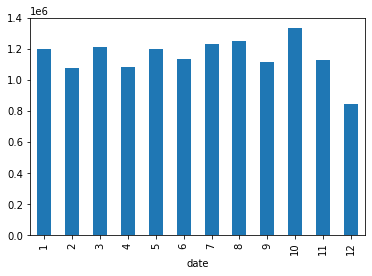

In [14]:
# PLOT NUMBER OF ENTRIES PER MONTH
series_dates_dt.groupby(series_dates_dt.dt.month).count().plot.bar()

In [15]:
# NUMBER OF ENTRIES PER YEAR
series_dates_dt.groupby(series_dates_dt.dt.year).count()

date
2000     837355
2001     774898
2002     826599
2003     960874
2004    1163498
2005    1078890
2006    1070736
2007    1399048
2008    1754416
2009     985903
2010     980261
2011     761353
2012     400961
2013     280688
2014     195778
2015     145190
2016      84211
2017      37517
2018      46742
2019      17584
Name: date, dtype: int64

<AxesSubplot:xlabel='date'>

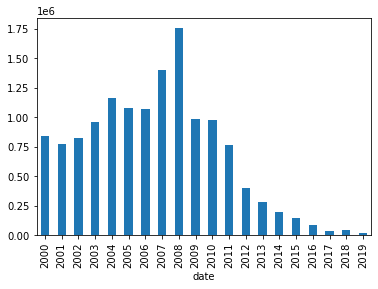

In [16]:
# PLOT NUMBER OF ENTRIES PER YEAR
series_dates_dt.groupby(series_dates_dt.dt.year).count().plot.bar()

In [17]:
# NUMBER OF DAYS OF THE WEEK
series_dates_dt.groupby(series_dates_dt.dt.dayofweek).count()

date
0    2437030
1    2848455
2    2907270
3    2830552
4    2557673
6     221522
Name: date, dtype: int64

<AxesSubplot:xlabel='date'>

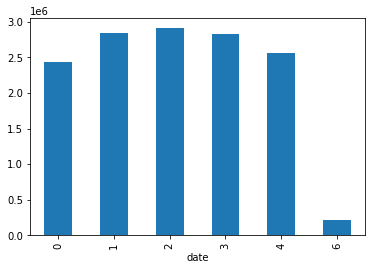

In [18]:
# PLOT NUMBER OF DAYS OF THE WEEK
series_dates_dt.groupby(series_dates_dt.dt.dayofweek).count().plot.bar()

# PRICES ANALYSIS

In [19]:
# PRICES ANALYSIS
# Min price
min_price = series_prices.min()
df_min_price = df_original[series_prices == min_price]
dates_min_price = df_min_price.loc[:, 'date']
print(f'Min price: {min_price}. Location(s) and date(s): ')
print(f'{dates_min_price}')

# Max price
max_price = series_prices.max()
df_max_price = df_original[series_prices == max_price]
dates_max_price = df_max_price.loc[:, 'date']
print(f'Max price: {max_price}. Location(s) and date(s): ')
print(f'{dates_max_price}')

# Average price
mean_price = series_prices.mean()
print(f'Mean price: {mean_price}')
median_price = series_prices.median()
print(f'Median price: {median_price}')
mode_price = series_prices.mode()[0]
print(f'Mode price: {mode_price}')
std_price = series_prices.std()
print(f'Standard deviation of price: {std_price}')

Min price: 665.7. Location(s) and date(s): 
10080343    03/06/2009
Name: date, dtype: object
Max price: 3253.5. Location(s) and date(s): 
13802454    12/27/2019
Name: date, dtype: object
Mean price: 1247.1442184422885
Median price: 1223.1
Mode price: 1268.0
Standard deviation of price: 264.5759582806057


In [20]:
list(dates_min_price)

['03/06/2009']

<AxesSubplot:ylabel='Frequency'>

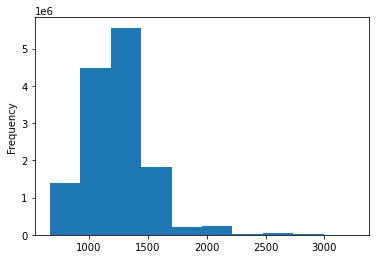

In [21]:
# PLOT PRICE HISTOGRAM
series_prices.plot.hist()

In [22]:
pd.unique(df['price'])

array([1496.4, 1496. , 1495.5, 1495. , 1494.5, 1494.7, 1495.3, 1494.8,
       1494.1, 1494. , 1493.5, 1493.6, 1493.8, 1493. , 1492.5, 1492.8,
       1492.2, 1492. , 1491.5, 1491. , 1491.1, 1492.3, 1492.7, 1493.2,
       1491.3, 1491.2, 1490.8, 1490.5, 1490.1, 1490. , 1489.5, 1489. ,
       1489.8, 1488.5, 1488. , 1487.5, 1487. , 1487.1, 1486.5, 1486. ,
       1485.5, 1485. , 1484.5, 1484. , 1484.2, 1484.3, 1483.8, 1483.7,
       1483.6, 1483.5, 1483. , 1483.1, 1486.3, 1485.8, 1487.3, 1487.2,
       1486.1, 1485.7, 1485.2, 1485.1, 1484.8, 1484.7, 1484.1, 1483.3,
       1483.2, 1482.5, 1482. , 1481.5, 1482.6, 1481.8, 1481.6, 1482.3,
       1481. , 1480.8, 1480.5, 1480. , 1480.3, 1479.7, 1479.6, 1479.5,
       1479.3, 1479.2, 1479. , 1480.9, 1481.2, 1480.6, 1483.9, 1484.9,
       1485.3, 1482.8, 1480.7, 1480.1, 1482.2, 1479.8, 1478.8, 1478.6,
       1478.5, 1478.2, 1478. , 1477.8, 1477.7, 1477.6, 1477.5, 1478.3,
       1477. , 1476.5, 1476. , 1476.2, 1476.8, 1475.8, 1475.6, 1475.5,
      

# VOLUME ANALYSIS

In [23]:
# RETURN TRADES DF
df_trades = DFTrades(df)
num_trades = df_trades.shape[0]

In [24]:
# VOLUMES ANALYSIS
# Total volume
total_volume = series_volumes.sum()
print(total_volume)

# Max volume
max_volume = series_volumes.max()
df_max_volume = df[series_volumes == max_volume]
dates_max_volume = df_max_volume.loc[:, 'date']
print(f'Max volume: {max_volume}. Details:')
print(f'{df_max_volume}')

# Average volume
mean_volume = series_volumes.mean()
print(f'Mean volume: {mean_volume}')
median_volume = series_volumes.median()
print(f'Median volume: {median_volume}')
mode_volume = series_volumes.mode()
print(f'Mode volume: {mode_volume}')

std_volume = series_volumes.std()
print(f'Standard deviation: {std_volume}')

11698499
Max volume: 4086. Details:
              date          time   price  volume
4201942 2004-08-31  16:16:02.000  1104.3    4086
4201943 2004-08-31  16:16:02.000  1104.3    4086
4203332 2004-09-01  07:12:39.000  1104.3    4086
4203333 2004-09-01  07:12:39.000  1104.3    4086
Mean volume: 0.8475636518654371
Median volume: 0.0
Mode volume: 0    0
dtype: int64
Standard deviation: 6.588166890744153


In [25]:
# TRADES DATAFRAME
df_trades = DFTrades(df)
df_trades

,date,time,price,volume
2812944,2003-06-30,23:00:06.000,971.9,1
2812945,2003-06-30,23:00:14.000,972.0,1
2812946,2003-06-30,23:04:16.000,972.0,1
2812947,2003-06-30,23:04:34.000,972.0,9
2812948,2003-06-30,23:05:02.000,972.0,91
...,...,...,...,...
13802469,2019-12-30,05:10:00.438,3238.3,1
13802470,2019-12-30,05:26:01.100,3237.7,1
13802471,2019-12-30,05:47:18.026,3238.4,1
13802472,2019-12-30,08:08:53.765,3242.6,6


In [26]:
# MEAN VOLUME GIVEN VOLUME > 0
df_trades['volume'].mean()

1.800299472844692

In [27]:
# DATETIMEINDEX FOR TRADE DATES
series_dates_trades = df_trades['date']
series_dates_trades
datet_index_trades = pd.DatetimeIndex(series_dates_trades)
datet_index_trades

DatetimeIndex(['2003-06-30', '2003-06-30', '2003-06-30', '2003-06-30',
               '2003-06-30', '2003-06-30', '2003-06-30', '2003-06-30',
               '2003-06-30', '2003-06-30',
               ...
               '2019-12-27', '2019-12-27', '2019-12-27', '2019-12-30',
               '2019-12-30', '2019-12-30', '2019-12-30', '2019-12-30',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=6498085, freq=None)

In [28]:
# NUMBER OF DAYS OF THE WEEK
dt_index_day_name = datet_index_trades.day_name()
dt_index_day_name.value_counts()

Wednesday    1348452
Tuesday      1320558
Thursday     1316710
Friday       1166981
Monday       1124838
Sunday        220546
Name: date, dtype: int64

# ANALYSIS BY DATE

In [29]:
# DATAFRAME FOR ONE DATE
date = dates[0]
print(date)
df_date = DFDate(df, date)
df_date

01/03/2000


,date,time,price,volume
0,2000-01-03,08:30:34.000,1496.4,0
1,2000-01-03,08:30:36.000,1496.0,0
2,2000-01-03,08:30:37.000,1495.5,0
3,2000-01-03,08:30:46.000,1495.0,0
4,2000-01-03,08:30:53.000,1495.5,0
...,...,...,...,...
4329,2000-01-03,15:14:20.000,1467.6,0
4330,2000-01-03,15:14:23.000,1467.7,0
4331,2000-01-03,15:14:23.000,1467.8,0
4332,2000-01-03,15:14:25.000,1467.5,0


In [30]:
# GET QUANTITIES FOR ONE DATE
date = df_date.iloc[0,0]
day_name_date = pd.to_datetime(date).day_name()
num_entries_date = df_date.shape[0]
num_trades_date = (df_date['volume'] != 0).sum()
min_price_date = df_date['price'].min()
max_price_date = df_date['price'].max()
mean_price_date = df_date['price'].mean()
median_price_date = df_date['price'].median()
std_price_date = df_date['price'].std()
mean_volume = df_date['volume'].mean()
max_volume = df_date['volume'].max()
min_time_date = df_date['time'].min()
max_time_date = df_date['time'].max()
list_date = [day_name_date, num_entries_date, min_price_date, max_price_date, \
    mean_price_date, median_price_date, std_price_date, mean_volume, max_volume, \
    min_time_date, max_time_date]
list_date

['Monday',
 4334,
 1452.0,
 1496.4,
 1464.939478541757,
 1461.7,
 9.232994488212606,
 0.0,
 0,
 '08:30:34.000',
 '15:14:30.000']

In [31]:
# FUNCTIONS
# Analyse one date
def DateAnalysis(df_date):
    '''Calls Analysis, adds day of week'''
    date = df_date.iloc[0,0]
    day_name_date = pd.to_datetime(date).day_name()
    day_analysis = Analysis(df_date)
    date_analysis = day_analysis.insert(0, day_name_date)
    return day_analysis

In [32]:
# USE FUNCTION
df_date = DFDate(df, dates[0])
df_date
DateAnalysis(df_date)

['Monday',
 4334,
 0,
 0,
 0.0,
 0.0,
 nan,
 nan,
 0,
 1452.0,
 1496.4,
 1464.939478541757,
 1461.7,
 9.232994488212606,
 '08:30:34.000',
 '15:14:30.000']

In [33]:
# ANALYSE MULTIPLE DATES AT ONCE
dict_dates = {}
# my_dates = list(dates[0:5])
# print(type(my_dates))
for i in range(0, 2):
    df_date = DFDate(df, dates[i])
    list_date = DateAnalysis(df_date)
    dict_dates[dates[i]] = list_date
    
dict_dates

{'01/03/2000': ['Monday',
  4334,
  0,
  0,
  0.0,
  0.0,
  nan,
  nan,
  0,
  1452.0,
  1496.4,
  1464.939478541757,
  1461.7,
  9.232994488212606,
  '08:30:34.000',
  '15:14:30.000'],
 '01/04/2000': ['Tuesday',
  4202,
  0,
  0,
  0.0,
  0.0,
  nan,
  nan,
  0,
  1409.5,
  1453.5,
  1434.8815326035142,
  1437.0,
  12.189578697954222,
  '08:30:08.000',
  '15:14:34.000']}

# ANALYSIS BY DAY OF WEEK

In [34]:
# EXTRACT DAY
DFDay(df, 1)

,date,time,price,volume
4334,2000-01-04,08:30:08.000,1451.0,0
4335,2000-01-04,08:30:14.000,1450.5,0
4336,2000-01-04,08:30:14.000,1450.0,0
4337,2000-01-04,08:30:20.000,1450.5,0
4338,2000-01-04,08:30:25.000,1451.0,0
...,...,...,...,...
13802497,2019-12-31,15:00:02.086,3232.0,0
13802498,2019-12-31,15:00:09.277,3231.5,0
13802499,2019-12-31,15:00:14.203,3230.5,0
13802500,2019-12-31,15:01:09.088,3233.0,0


In [35]:
# CREATE DICTIONARY OF DATAFRAMES FOR EACH DAY
dict_day = {}
for i in list_days:
    df_day = DFDay(df, i)
    dict_day[i] = df_day
    dict_day[calendar.day_name[i]] = dict_day.pop(i)

In [36]:
# VIEW DICTIONARY OF DATAFRAMES FOR EACH DAY
dict_day

{'Monday':                date          time   price  volume
 0        2000-01-03  08:30:34.000  1496.4       0
 1        2000-01-03  08:30:36.000  1496.0       0
 2        2000-01-03  08:30:37.000  1495.5       0
 3        2000-01-03  08:30:46.000  1495.0       0
 4        2000-01-03  08:30:53.000  1495.5       0
 ...             ...           ...     ...     ...
 13802487 2019-12-30  15:00:15.326  3224.0       0
 13802488 2019-12-30  15:00:35.775  3222.0       0
 13802489 2019-12-30  15:02:06.047  3224.0       0
 13802490 2019-12-30  15:03:58.388  3225.0       0
 13802491 2019-12-30  15:07:13.520  3224.0       0
 
 [2437030 rows x 4 columns],
 'Tuesday':                date          time   price  volume
 4334     2000-01-04  08:30:08.000  1451.0       0
 4335     2000-01-04  08:30:14.000  1450.5       0
 4336     2000-01-04  08:30:14.000  1450.0       0
 4337     2000-01-04  08:30:20.000  1450.5       0
 4338     2000-01-04  08:30:25.000  1451.0       0
 ...             ...          

In [37]:
# CONSTRUCT AGGREGATE FIGURES FROM INDIVIDUAL DATAFRAMES (PART 1)
agg_entries = 0
agg_trades = 0
agg_volume_total = 0
agg_volumes = []
for key in dict_day.keys():
    agg_entries += dict_day[key].shape[0]
    agg_trades += DFTrades(dict_day[key]).shape[0]
    agg_volumes.extend(dict_day[key]['volume'])

In [38]:
# CONSTRUCT AGGREGATE FIGURES FROM INDIVIDUAL DATAFRAMES (PART 2)
add_volume_series = pd.Series(agg_volumes)
agg_volume_mean = add_volume_series.mean()
agg_volume_std = add_volume_series.std()
print(agg_volume_mean)
agg_list = [agg_entries, agg_trades, agg_volume_total, agg_volume_mean, agg_volume_std]
# agg_list

0.8475636518654371


In [39]:
# CREATE DICTIONARY WITH DAY ANALYSIS 
dict_day_analysis = {}
for key in dict_day.keys():
    date_analysis = Analysis(dict_day[key])
    dict_day_analysis[key] = date_analysis

In [40]:
# VIEW DICTIONARY WITH DAY ANALYSIS 
dict_day_analysis

{'Monday': [2437030,
  1124838,
  2031788,
  0.8337148085989914,
  6.613373684101227,
  1.8062938840970877,
  9.643729984303981,
  2477,
  671.1,
  3242.6,
  1243.0781829108212,
  1218.1,
  268.51873461687984,
  '00:00:00.000',
  '23:59:59.230'],
 'Tuesday': [2848455,
  1320558,
  2397472,
  0.84167452180217,
  8.391668097913547,
  1.8154992056388284,
  12.252707113508816,
  4086,
  681.4,
  3233.0,
  1246.2599114599818,
  1222.3,
  263.3646182577742,
  '00:00:00.000',
  '23:59:59.678'],
 'Wednesday': [2907270,
  1348452,
  2437870,
  0.8385426878136534,
  6.903028545127937,
  1.8079026913824148,
  10.049133449388673,
  4086,
  696.9,
  3201.0,
  1248.3870731640986,
  1223.7,
  260.89890995923804,
  '00:00:00.000',
  '23:59:59.876'],
 'Thursday': [2830552,
  1316710,
  2313905,
  0.8174748246985041,
  4.762975655056181,
  1.757338366079091,
  6.864158555830054,
  1880,
  676.5,
  3244.0,
  1247.4850271955859,
  1223.3,
  264.340246066831,
  '00:00:00.000',
  '23:59:59.603'],
 'Friday':

# ANALYSIS BY MONTH

In [41]:
# EXTRACT MONTH
DFMonth(df, 1)

,date,time,price,volume
0,2000-01-03,08:30:34.000,1496.4,0
1,2000-01-03,08:30:36.000,1496.0,0
2,2000-01-03,08:30:37.000,1495.5,0
3,2000-01-03,08:30:46.000,1495.0,0
4,2000-01-03,08:30:53.000,1495.5,0
...,...,...,...,...
13787540,2019-01-31,19:45:07.476,2702.1,1
13787541,2019-01-31,19:47:34.969,2705.7,1
13787542,2019-01-31,19:55:37.256,2703.6,1
13787543,2019-01-31,23:02:25.053,2702.3,1


In [42]:
# CREATE DICTIONARY OF DATAFRAMES FOR EACH MONTH
dict_month = {}
for i in range(1, len(list_months)+1):
    df_month = DFMonth(df, i)
    dict_month[calendar.month_name[i]] = df_month

In [43]:
# VIEW DICTIONARY OF DATAFRAMES FOR EACH MONTH
dict_month

{'January':                date          time   price  volume
 0        2000-01-03  08:30:34.000  1496.4       0
 1        2000-01-03  08:30:36.000  1496.0       0
 2        2000-01-03  08:30:37.000  1495.5       0
 3        2000-01-03  08:30:46.000  1495.0       0
 4        2000-01-03  08:30:53.000  1495.5       0
 ...             ...           ...     ...     ...
 13787540 2019-01-31  19:45:07.476  2702.1       1
 13787541 2019-01-31  19:47:34.969  2705.7       1
 13787542 2019-01-31  19:55:37.256  2703.6       1
 13787543 2019-01-31  23:02:25.053  2702.3       1
 13787544 2019-01-31  23:02:50.307  2702.3       3
 
 [1200674 rows x 4 columns],
 'February':                date          time   price  volume
 82906    2000-02-01  08:30:27.000  1400.0       0
 82907    2000-02-01  08:30:29.000  1399.0       0
 82908    2000-02-01  08:30:39.000  1399.5       0
 82909    2000-02-01  08:30:41.000  1400.0       0
 82910    2000-02-01  08:31:02.000  1399.5       0
 ...             ...        

In [44]:
# CREATE DICTIONARY OF MONTH ANALYSIS 
dict_month_analysis = {}
for key in dict_month.keys():
    month_analysis = Analysis(dict_month[key])
    dict_month_analysis[key] = month_analysis

In [45]:
# VIEW DICTIONARY OF MONTH ANALYSIS
dict_month_analysis

{'January': [1200674,
  559920,
  993201,
  0.827202887711402,
  5.514698922986713,
  1.7738266180882982,
  7.9708969494520305,
  1442,
  797.0,
  2878.4,
  1272.2046417261447,
  1280.2,
  262.6689704117716,
  '00:00:00.000',
  '23:59:59.603'],
 'February': [1077172,
  472506,
  835478,
  0.7756217205794432,
  5.691169961492476,
  1.7681849542651311,
  8.490182809425894,
  1892,
  730.5,
  2836.4,
  1251.1538438615548,
  1285.4,
  279.62987663641496,
  '00:00:00.000',
  '23:59:59.678'],
 'March': [1214224,
  541351,
  1001467,
  0.8247794476142788,
  7.5417673756755885,
  1.8499402420980104,
  11.210655852673899,
  2858,
  665.7,
  2862.2,
  1247.6170204178768,
  1275.8,
  274.7633641488043,
  '00:00:00.000',
  '23:59:59.000'],
 'April': [1079577,
  476326,
  900343,
  0.8339775671397223,
  6.460741944988804,
  1.8901823541020226,
  9.623341145196044,
  1440,
  779.5,
  2956.5,
  1262.4205015483378,
  1219.0,
  262.13923850861084,
  '00:00:00.000',
  '23:59:58.000'],
 'May': [1196972,


# ANALYSIS BY YEAR

In [46]:
# EXTRACT YEAR
DFYear(df, 2019)

,date,time,price,volume
13784918,2019-01-01,17:01:44.013,2511.4,1
13784919,2019-01-01,17:02:40.684,2514.2,1
13784920,2019-01-01,17:02:40.794,2514.7,1
13784921,2019-01-01,17:02:51.397,2517.0,1
13784922,2019-01-01,17:06:32.898,2513.9,1
...,...,...,...,...
13802497,2019-12-31,15:00:02.086,3232.0,0
13802498,2019-12-31,15:00:09.277,3231.5,0
13802499,2019-12-31,15:00:14.203,3230.5,0
13802500,2019-12-31,15:01:09.088,3233.0,0


In [47]:
# CREATE DICTIONARY OF DATAFRAMES FOR EACH YEAR
dict_year = {}
for i in range(0, len(list_years)):
    df_year = DFYear(df, list_years[i])
    dict_year[list_years[i]] = df_year

In [48]:
# VIEW DICTIONARY OF DATAFRAMES FOR EACH YEAR
dict_year

{2000:              date          time   price  volume
 0      2000-01-03  08:30:34.000  1496.4       0
 1      2000-01-03  08:30:36.000  1496.0       0
 2      2000-01-03  08:30:37.000  1495.5       0
 3      2000-01-03  08:30:46.000  1495.0       0
 4      2000-01-03  08:30:53.000  1495.5       0
 ...           ...           ...     ...     ...
 837350 2000-12-29  15:04:10.000  1327.5       0
 837351 2000-12-29  15:04:13.000  1327.0       0
 837352 2000-12-29  15:04:20.000  1326.5       0
 837353 2000-12-29  15:04:25.000  1327.0       0
 837354 2000-12-29  15:04:33.000  1326.5       0
 
 [837355 rows x 4 columns],
 2001:               date          time   price  volume
 837355  2001-01-02  08:30:33.000  1330.0       0
 837356  2001-01-02  08:30:35.000  1330.5       0
 837357  2001-01-02  08:30:35.000  1331.0       0
 837358  2001-01-02  08:31:03.000  1331.5       0
 837359  2001-01-02  08:31:03.000  1331.0       0
 ...            ...           ...     ...     ...
 1612248 2001-12-31 

In [49]:
# CREATE DICTIONARY OF YEAR ANALYSIS 
dict_year_analysis = {}
for key in dict_year.keys():
    year_analysis = Analysis(dict_year[key])
    dict_year_analysis[key] = year_analysis

In [50]:
# VIEW DICTIONARY OF YEAR ANALYSIS
dict_year_analysis

{2000: [837355,
  0,
  0,
  0.0,
  0.0,
  nan,
  nan,
  0,
  1270.0,
  1574.0,
  1440.50922058062,
  1446.7,
  56.377491546760474,
  '08:30:04.000',
  '15:14:58.000'],
 2001: [774898,
  0,
  0,
  0.0,
  0.0,
  nan,
  nan,
  0,
  939.0,
  1390.0,
  1197.899452056598,
  1195.0,
  88.75122312364961,
  '08:30:00.000',
  '15:14:57.000'],
 2002: [826599,
  0,
  0,
  0.0,
  0.0,
  nan,
  nan,
  0,
  767.5,
  1178.5,
  993.3507876248156,
  977.5,
  115.0214552801251,
  '08:30:00.000',
  '15:14:59.000'],
 2003: [960874,
  267612,
  621756,
  0.6470733935979119,
  9.666688875315698,
  2.323348728756558,
  18.210566065553056,
  2375,
  788.5,
  1111.5,
  974.685303380252,
  993.0,
  75.93819693717117,
  '00:00:00.000',
  '23:59:52.000'],
 2004: [1163498,
  574624,
  1221108,
  1.0495144813312958,
  12.567638242269805,
  2.125055688589408,
  17.819164354768862,
  4086,
  1060.2,
  1219.7,
  1127.087918844659,
  1124.6,
  30.30523666413337,
  '00:00:00.000',
  '23:59:59.000'],
 2005: [1078890,
  53

# LAST-DIGIT ANALYSIS

In [51]:
# FUNCTIONS
def ShowColumn(df, col):
    df_trades = DFTrades(df)
    prices = df_trades[col]
    prices = pd.unique(prices)
    prices.sort()
    return prices

def TradedVolumeCounts(df, dp, col):
    df_trades = DFTrades(df)
    series_tp = df_trades[col]
    series_tp_str = series_tp.apply(lambda x: "{:.{dp}f}".format(x, dp=dp))
    series_tp_last_digit = series_tp_str.str.strip().str[-1]
    last_digit_counts = series_tp_last_digit.value_counts(ascending=False)
    last_digit_counts = last_digit_counts.sort_index()
    return last_digit_counts

In [52]:
# SHOW PRICES
ShowColumn(df, 'price')

array([ 671.1,  671.2,  671.5,  671.6,  671.7,  672. ,  672.1,  672.2,
        672.3,  672.4,  672.5,  672.6,  672.8,  672.9,  673. ,  673.1,
        673.4,  673.5,  673.6,  673.7,  673.8,  673.9,  674. ,  674.1,
        674.2,  674.3,  674.4,  674.5,  674.6,  674.7,  674.8,  674.9,
        675. ,  675.1,  675.2,  675.3,  675.4,  675.5,  675.6,  675.7,
        675.8,  675.9,  676. ,  676.1,  676.2,  676.3,  676.4,  676.5,
        676.6,  676.7,  676.8,  676.9,  677. ,  677.1,  677.2,  677.3,
        677.4,  677.5,  677.6,  677.7,  677.8,  677.9,  678. ,  678.1,
        678.2,  678.3,  678.4,  678.5,  678.6,  678.7,  678.8,  678.9,
        679. ,  679.1,  679.2,  679.3,  679.4,  679.5,  679.6,  679.7,
        679.8,  679.9,  680. ,  680.1,  680.2,  680.3,  680.4,  680.5,
        680.6,  680.7,  680.8,  680.9,  681. ,  681.1,  681.2,  681.3,
        681.4,  681.5,  681.6,  681.7,  681.8,  681.9,  682. ,  682.1,
        682.2,  682.3,  682.4,  682.5,  682.6,  682.7,  682.8,  682.9,
      

In [53]:
# LAST-DIGIT ANALYSIS
last_digit_prices = TradedVolumeCounts(df, 1, 'price')
last_digit_prices

0    1123765
1     513478
2     623348
3     621304
4     518938
5     795303
6     529727
7     623385
8     644406
9     504431
Name: price, dtype: int64

In [54]:
# VOLUME COUNTS
volume_counts = df_trades['volume'].value_counts()
volume_counts

1       4776240
2        934867
3        271162
4        167804
5        146894
         ...   
688           1
1079          1
1141          1
171           1
598           1
Name: volume, Length: 504, dtype: int64

In [55]:
# LAST-DIGIT VOLUME
last_digit_volume = TradedVolumeCounts(df, 0, 'volume')
last_digit_volume

0      39148
1    4783328
2     943800
3     276151
4     172644
5     153694
6      50626
7      30679
8      28302
9      19713
Name: volume, dtype: int64

# EXPORT TO EXCEL

In [56]:
# CELL FORMATTING
def CellFormat(workbook):
    global cell_format_none
    cell_format_none = workbook.add_format()
    global cell_format_bold
    cell_format_bold = workbook.add_format({'bold': True})
    global cell_format_italic
    cell_format_italic = workbook.add_format({'italic': True})
    global cell_format_0dp
    cell_format_0dp = workbook.add_format({'num_format': '0'})
    global cell_format_2dp
    cell_format_2dp = workbook.add_format({'num_format': '0.00'})
    global cell_format_left
    cell_format_left = workbook.add_format({'align': 'left'})
    global cell_format_right
    cell_format_right = workbook.add_format({'align': 'right'})
    global cell_format_percent
    cell_format_percent = workbook.add_format({'num_format': 9})

In [57]:
# FUNCTIONS
# Write metadata
metadata_headings = ['Quantity', 'Value']
metadata_quantities = ['Number of rows', 'Number of columns', \
                      'Number of dates', 'First date', 'Last date', \
                      'Min price', 'Min price dates', 'Max price', 'Max price dates']
metadata_values = [n, num_cols, num_dates, dates[0], dates[-1], \
                  min_price, ''.join(list(dates_min_price)), \
                    max_price, ''.join(list(dates_max_price))]
def WriteMetadata(worksheet, row, col):
    row_metadata = row
    row_metadata_price = row_metadata + 7
    row_metadata_volume = row_metadata_price + 8
    col_metadata = col
    worksheet.write(0, 0, 'S&P ANALYSIS', cell_format_bold)
    worksheet.write(row_metadata, col_metadata, 'METADATA', cell_format_bold)
    for i in range(len(metadata_headings)):
        worksheet.write(row_metadata+1, col_metadata+i, metadata_headings[i], cell_format_bold)
    for i in range(len(metadata_quantities)):
        worksheet.write(row_metadata+2+i, col_metadata, metadata_quantities[i])
        worksheet.write(row_metadata+2+i, col_metadata+1, metadata_values[i])

def WriteDates(worksheet):
    for i in range(num_dates):
        worksheet.write(i, 0, dates[i])

def WriteAnalysis(heading_section, dict, row, col, worksheet):
    analysis_cell_formatting = [cell_format_none, cell_format_none, cell_format_none, cell_format_2dp, cell_format_2dp, \
                                cell_format_2dp, cell_format_2dp, cell_format_none, cell_format_none, cell_format_none, \
                                cell_format_0dp, cell_format_0dp, \
                                cell_format_0dp, cell_format_right, cell_format_right]
    # Write content
    worksheet.write(row, col, heading_section, cell_format_bold)
    for i in range(len(analysisHeadings)):
        worksheet.write(row+1, col+1+i, analysisHeadings[i], cell_format_bold)
    row_modifier = 2
    # Loop through each key, writing the values:
    for i in range(len(dict)):
        worksheet.write(row+row_modifier, col, list(dict.keys())[i], cell_format_left)
        for j in range(len(list(dict.values())[i])):
            worksheet.write(row+row_modifier, col+j+1, list(dict.values())[i][j], analysis_cell_formatting[j])
        row += 1
    # Total row
    worksheet.write(row+row_modifier, col, 'Total', cell_format_italic)
    total_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
    formula_sum = '=SUM(INDIRECT("{0}"&{1}&":"&"{0}"&{2}))'
    formula_max = '=MAX(INDIRECT("{0}"&{1}&":"&"{0}"&{2}))'
    formula_min = '=MIN(INDIRECT("{0}"&{1}&":"&"{0}"&{2}))'
    total_formulas = ['Total', formula_sum, formula_sum, formula_sum, '', '', '', '', formula_max, formula_min, formula_max, '', '', '', '', '']
    for i in range(0, 14):
        worksheet.write(row+row_modifier, col+i, total_formulas[i]\
                        .format(total_letters[i], row+row_modifier+1-len(dict), row+row_modifier), cell_format_italic)

def WriteTradedPrices(traded_price_count, row, col, worksheet, headings: list):
    row_0 = row
    for i in range(len(headings)):
        worksheet.write(row, col+i, headings[i], cell_format_bold)
    for i in range(0, traded_price_count.size):
        worksheet.write(row+1, col, traded_price_count.index[i])
        worksheet.write(row+1, col+1, traded_price_count.iloc[i])
        worksheet.write(row+1, col+2, '={0}{1}/{0}{2}'.format(alphabet[col+1], row+2, row_0+2+traded_price_count.size), cell_format_percent)
        row += 1
    formula_sum = '=SUM(INDIRECT("{0}"&{1}&":"&"{0}"&{2}))'
    total_formulas = ['Total', formula_sum, formula_sum]
    for i in range(0, len(headings)):
        worksheet.write(row+1, col+i, total_formulas[i]\
                        .format(alphabet[i], row+2-traded_price_count.size, row+1), cell_format_italic)
#     worksheet.write(row+1, col+len(headings)-1, , cell_format_percent)

In [58]:
# WRITE TO EXCEL
import xlsxwriter
number = 151
# filename = f'SP analysis {number}.xlsx'
filename = 'S&P 500 futures analysis.xlsx'
workbook = xlsxwriter.Workbook(filename, {'nan_inf_to_errors': True})

sheetname_1 = 'SP'
sheetname_2 = 'Dates'
sheetname_3 = 'Round'
worksheet_1 = workbook.add_worksheet(sheetname_1)
worksheet_2 = workbook.add_worksheet(sheetname_2)
worksheet_3 = workbook.add_worksheet(sheetname_3)

# Cell formatting
column_widths = [18, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 8.43, 11, 11]
for i in range(0, len(column_widths)):
    worksheet_1.set_column(i, i, column_widths[i])

row_all = len(metadata_quantities)+5
row_dayofweek = row_all + 4 + 1
row_month = row_dayofweek + 4 + len(list_days)
row_year = row_month + 4 + len(list_months)

# Write
CellFormat(workbook)
WriteMetadata(worksheet_1, 2, 0)
WriteAnalysis('ANALYSIS OF ALL ENTRIES', dict_analysis, row_all, 0, worksheet_1)
WriteAnalysis('ANALYSIS BY DAY OF WEEK', dict_day_analysis, row_dayofweek, 0, worksheet_1)
WriteAnalysis('ANALYSIS BY MONTH', dict_month_analysis, row_month, 0, worksheet_1)
WriteAnalysis('ANALYSIS BY YEAR', dict_year_analysis, row_year, 0, worksheet_1)  
WriteTradedPrices(last_digit_prices, 3, 0, worksheet_3, ['Last digit', 'Count', 'Percentage'])
WriteTradedPrices(last_digit_volume, 20, 0, worksheet_3, ['Traded quantity', 'Count', 'Percentage'])
WriteTradedPrices(volume_counts, 40, 0, worksheet_3, ['Traded quantity', 'Count', 'Percentage'])


WriteDates(worksheet_2)

workbook.close()